# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"] 
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | cam pha mines
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | chahuites
Processing Record 7 of Set 1 | lincoln
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | newman
Processing Record 10 of Set 1 | kagizman
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | butajira
Processing Record 14 of Set 1 | ta`u
Processing Record 15 of Set 1 | kingston
Processing Record 16 of Set 1 | oriximina
Processing Record 17 of Set 1 | khandyga
Processing Record 18 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | tofol
Processing Record 21 of Set 1 | magadan
Processing Record 22 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.02,74,43,6.73,PN,1722731261
1,cam pha mines,21.0167,107.3000,27.34,85,43,3.94,VN,1722731352
2,punta arenas,-53.1500,-70.9167,2.06,75,100,5.14,CL,1722731314
3,margaret river,-33.9500,115.0667,9.76,92,3,3.55,AU,1722731055
4,kavaratti,10.5669,72.6420,27.71,79,100,5.87,IN,1722731355


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.02,74,43,6.73,PN,1722731261
1,cam pha mines,21.0167,107.3000,27.34,85,43,3.94,VN,1722731352
2,punta arenas,-53.1500,-70.9167,2.06,75,100,5.14,CL,1722731314
3,margaret river,-33.9500,115.0667,9.76,92,3,3.55,AU,1722731055
4,kavaratti,10.5669,72.6420,27.71,79,100,5.87,IN,1722731355


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

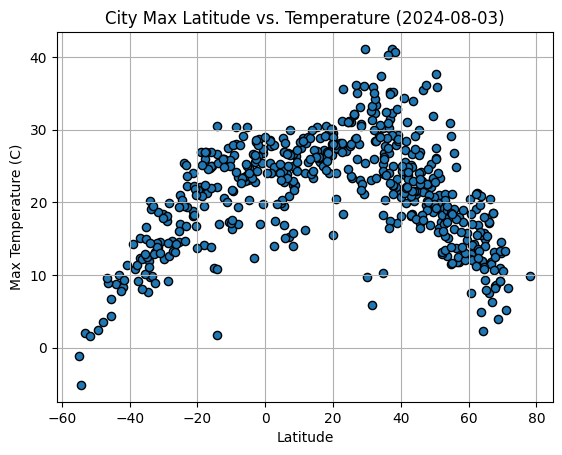

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x="Lat", y="Max Temp", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
date = city_data_df["Date"].apply(lambda x: time.strftime("%Y-%m-%d", time.localtime(x))).to_list()[0]
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

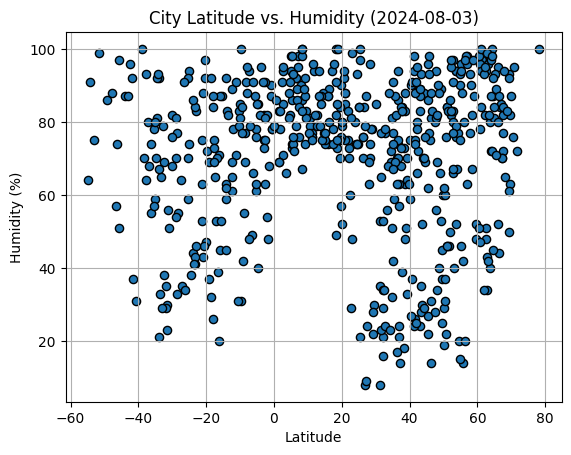

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x="Lat", y="Humidity", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

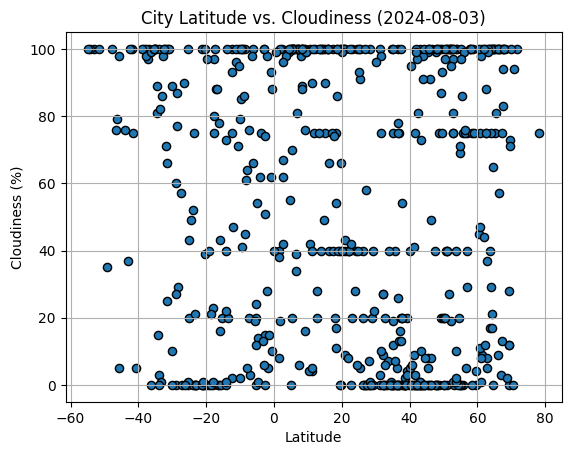

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x="Lat", y="Cloudiness", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

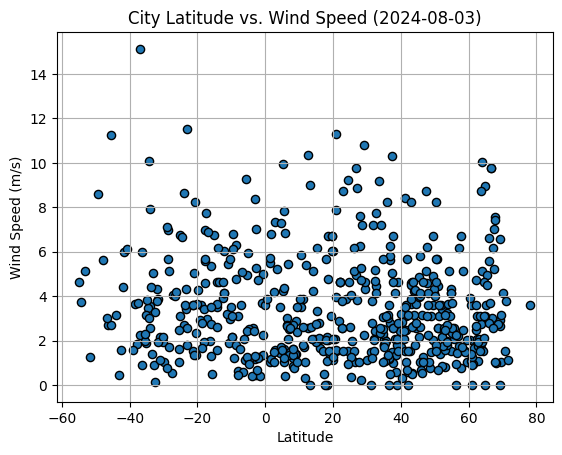

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x="Lat", y="Wind Speed", kind="scatter", edgecolor='black', s=35)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_scatter(x, y, xlabel="x", ylabel="y"):
    (slope, intercept, rvalue, _, _) = linregress(x, y)
    regress_values = x * slope + intercept
    print(f"The r^2 value is {rvalue}")
    plt.scatter(x, y)
    plt.plot(x, regress_values, color="red")
    equation_text = f'y = {slope:.2f}x + {intercept:.1f}'
    plt.text(x=x.min(), y=y.max(), s=equation_text, fontsize=10, color='red', verticalalignment='top')
    plt.title(f"{xlabel} vs {ylabel}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cam pha mines,21.0167,107.3000,27.34,85,43,3.94,VN,1722731352
4,kavaratti,10.5669,72.6420,27.71,79,100,5.87,IN,1722731355
5,chahuites,16.2833,-94.1833,28.82,80,66,1.68,MX,1722731357
6,lincoln,40.8000,-96.6670,34.38,37,0,2.06,US,1722731137
8,newman,37.3138,-121.0208,41.13,14,16,1.50,US,1722731360


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.02,74,43,6.73,PN,1722731261
2,punta arenas,-53.1500,-70.9167,2.06,75,100,5.14,CL,1722731314
3,margaret river,-33.9500,115.0667,9.76,92,3,3.55,AU,1722731055
7,waitangi,-43.9535,-176.5597,8.79,87,76,3.13,NZ,1722731225
10,port-aux-francais,-49.3500,70.2167,2.46,86,35,8.58,TF,1722731236


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is -0.5595764464778396


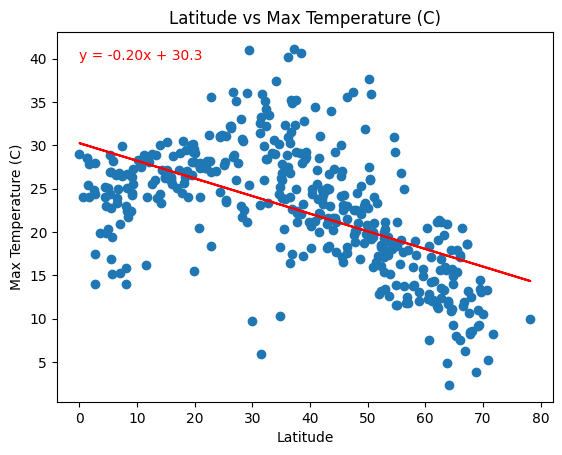

In [15]:
# Linear regression on Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Max Temp"], xlabel="Latitude", ylabel="Max Temperature (C)")

The r^2 value is 0.8026697458365207


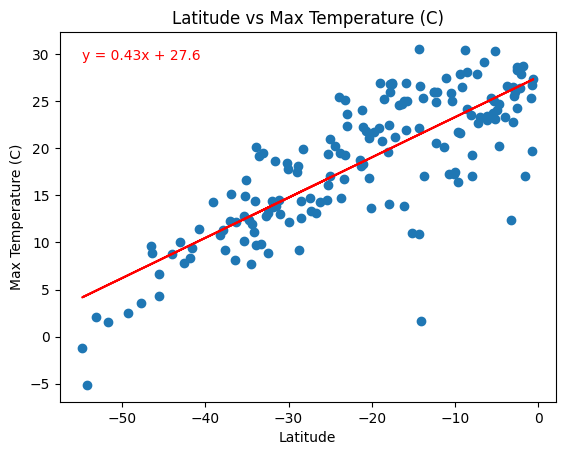

In [16]:
# Linear regression on Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Max Temp"], xlabel="Latitude", ylabel="Max Temperature (C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is -0.11565118317571847


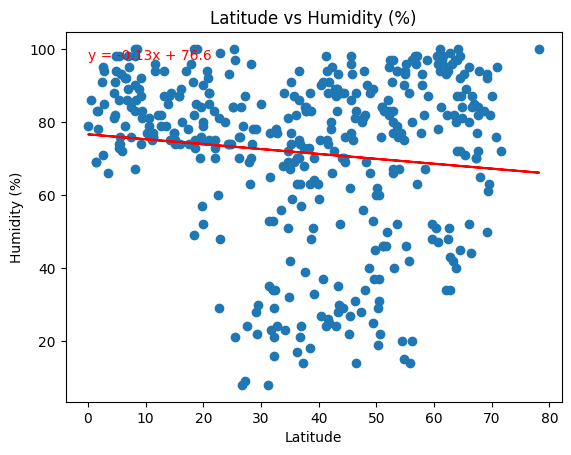

In [17]:
# Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Humidity"], xlabel="Latitude", ylabel="Humidity (%)")

The r^2 value is 0.07258339122305602


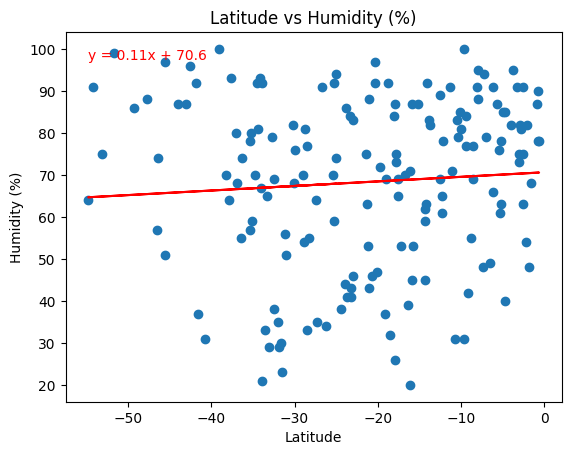

In [18]:
# Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Humidity"], xlabel="Latitude", ylabel="Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is -0.08317228371862334


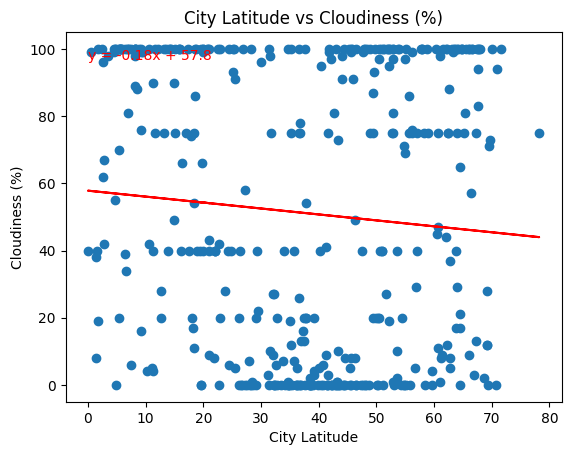

In [19]:
# Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Cloudiness"], xlabel="City Latitude", ylabel="Cloudiness (%)")

The r^2 value is -0.22256272350254727


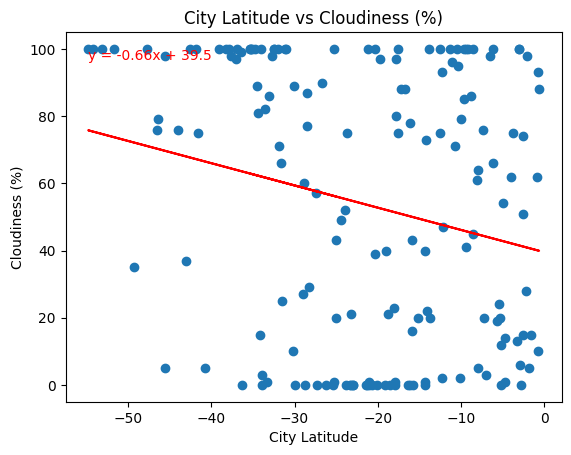

In [20]:
# Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Cloudiness"], xlabel="City Latitude", ylabel="Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is -0.009862881011026309


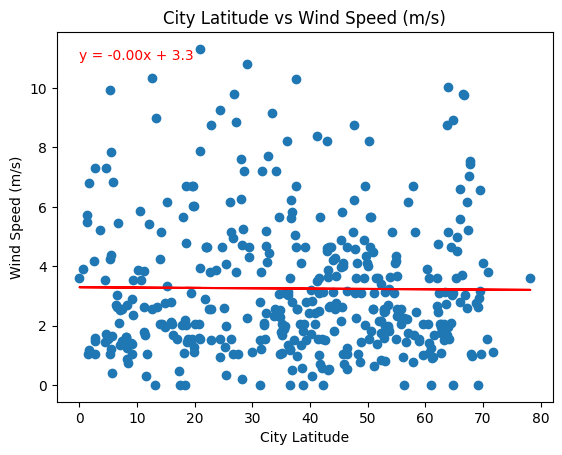

In [21]:
# Northern Hemisphere
plot_scatter(x=northern_hemi_df["Lat"], y=northern_hemi_df["Wind Speed"], xlabel="City Latitude", ylabel="Wind Speed (m/s)")

The r^2 value is -0.03706481549577091


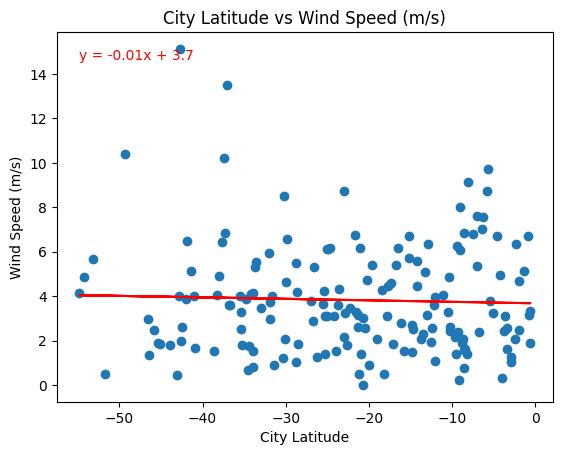

In [65]:
# Southern Hemisphere
plot_scatter(x=southern_hemi_df["Lat"], y=southern_hemi_df["Wind Speed"], xlabel="City Latitude", ylabel="Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE